###**Name: Faishal Monir<br>ID: 22101235<br>Section: 01<br>CSE: 427<br>LAB: 03**
#=============================

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


#avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Homework
Perform EDA and pre processing for the dataset below and then complete library implementation of AdaBoost Algorithm.

Dataset link for homework: **[click here](https://drive.google.com/file/d/1Y8ghWPACoC27B-CG440j4sJKEeGJsJi4/view?usp=sharing)**

Try with different number of estimators & learning rate and find the best model.

n_estimators_list = [10, 50, 100, 200, 500, 1000] <br>
learning_rate_list = [0.01, 0.1, 0.5, 0.9, 0.99]

In [2]:
# read dataset from a public Google Drive File

file_link = 'https://drive.google.com/file/d/1Y8ghWPACoC27B-CG440j4sJKEeGJsJi4/view'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head()


,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    191 non-null    float64
 2   Water_Frequency   192 non-null    object 
 3   Fertilizer_Type   192 non-null    object 
 4   Temperature       183 non-null    float64
 5   Humidity          191 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [4]:
df.shape

(193, 7)

In [5]:
df.describe(include='all')

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
count,193,191.000000,192,192,183.000000,191.000000,193.000000
unique,3,NaN,3,3,NaN,NaN,NaN
top,clay,NaN,daily,none,NaN,NaN,NaN
freq,67,NaN,73,74,NaN,NaN,NaN
mean,NaN,6.814887,NaN,NaN,25.017731,58.086350,0.497409
std,NaN,1.603823,NaN,NaN,5.363576,12.696306,0.501294
min,NaN,4.033133,NaN,NaN,15.200000,30.567682,0.000000
25%,NaN,5.464666,NaN,NaN,20.599339,49.056490,0.000000
50%,NaN,6.832000,NaN,NaN,25.912336,59.182806,0.000000
75%,NaN,8.252072,NaN,NaN,29.496670,69.150000,1.000000


In [6]:
df.nunique()

,0
Soil_Type,3
Sunlight_Hours,188
Water_Frequency,3
Fertilizer_Type,3
Temperature,180
Humidity,189
Growth_Milestone,2


In [7]:
df.isnull().sum()

,0
Soil_Type,0
Sunlight_Hours,2
Water_Frequency,1
Fertilizer_Type,1
Temperature,10
Humidity,2
Growth_Milestone,0


In [8]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist() #To retrive categorical data
num_cols = df.select_dtypes(include=np.number).columns.tolist() #To retrive numerial data
print("Categorical Variables:",cat_cols,end=" ")
print("\n")
print("Numerical Variables:",num_cols,end=" ")


Categorical Variables: ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'] 

Numerical Variables: ['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone'] 

Growth_Milestone
0    97
1    96
Name: count, dtype: int64


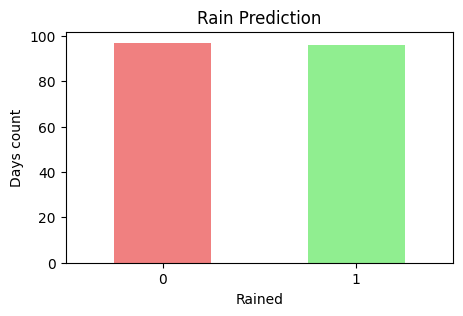

In [9]:
#Balanced Dataset

print(df.value_counts('Growth_Milestone'))

plt.figure(figsize=(5, 3))
df['Growth_Milestone'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Rain Prediction')
plt.xlabel('Rained')
plt.ylabel('Days count')
plt.xticks(rotation = 0)
plt.show()

<Figure size 800x600 with 0 Axes>

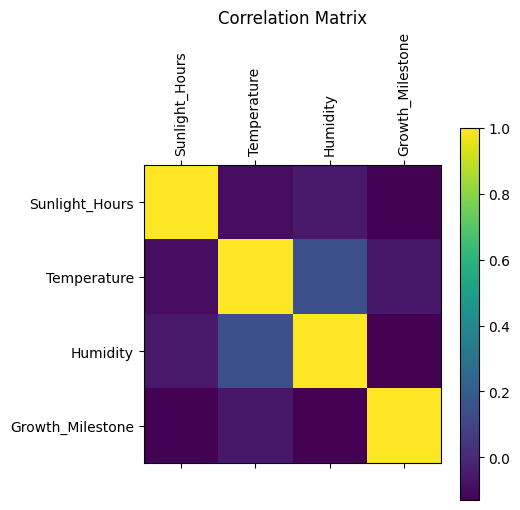

In [10]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
# print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

#===============================================================================
## **Data Manipulation**

In [11]:
df.dropna(subset=['Water_Frequency', 'Fertilizer_Type'], inplace=True)
df

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,NaN,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [12]:
df.isnull().sum()

,0
Soil_Type,0
Sunlight_Hours,2
Water_Frequency,0
Fertilizer_Type,0
Temperature,10
Humidity,2
Growth_Milestone,0


In [13]:
df['Sunlight_Hours'].fillna(df['Sunlight_Hours'].mean(), inplace=True)
df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)
df['Humidity'].fillna(df['Humidity'].mean(), inplace=True)

In [14]:
df.isnull().sum()

,0
Soil_Type,0
Sunlight_Hours,0
Water_Frequency,0
Fertilizer_Type,0
Temperature,0
Humidity,0
Growth_Milestone,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         191 non-null    object 
 1   Sunlight_Hours    191 non-null    float64
 2   Water_Frequency   191 non-null    object 
 3   Fertilizer_Type   191 non-null    object 
 4   Temperature       191 non-null    float64
 5   Humidity          191 non-null    float64
 6   Growth_Milestone  191 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 11.9+ KB


In [16]:
#['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'] Needs feature Engr.

In [17]:
df = pd.get_dummies(df, columns=['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'])

In [18]:
df.isnull().sum()

,0
Sunlight_Hours,0
Temperature,0
Humidity,0
Growth_Milestone,0
Soil_Type_clay,0
Soil_Type_loam,0
Soil_Type_sandy,0
Water_Frequency_bi-weekly,0
Water_Frequency_daily,0
Water_Frequency_weekly,0


In [19]:
df.head()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_chemical,Fertilizer_Type_none,Fertilizer_Type_organic
0,5.192294,31.719602,61.591861,0,False,True,False,True,False,False,True,False,False
1,4.033133,28.919484,52.422276,1,False,False,True,False,False,True,False,False,True
2,8.892769,23.179059,44.660539,0,False,True,False,True,False,False,False,True,False
3,8.241144,18.465886,46.433227,0,False,True,False,True,False,False,False,True,False
4,8.374043,25.016270,63.625923,0,False,False,True,True,False,False,False,False,True


In [20]:
df.shape

(191, 13)

#===================================================
##Ada Boost

In [21]:
X = df.drop(['Growth_Milestone'], axis=1)

y = df['Growth_Milestone']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X.shape

(191, 12)

In [23]:
y.shape

(191,)

In [24]:
# scaler=MinMaxScaler()
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.transform(X_test)

In [25]:
def ada_boost(X_train,X_test,y_train,y_test,n_est,rate):
    abc = AdaBoostClassifier(n_estimators=n_est,learning_rate=rate, random_state = 42)
    model = abc.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuraccy= f"{model.score(X_train, y_train):.3f}"
    pred= f"{model.score(X_test, y_test):.3f}"

    f=f"========================\nEstimator:{n_est}\nLearning Rate:{rate}\n========================"
    f += f"\nAccuracy score (training): {accuraccy}\n"
    f += f"\nAccuracy score (validation): {pred}\n"
    f += f"========================\n\n"
    return f,accuraccy,pred


In [26]:
n_estimators_list = [10, 50, 100, 200, 500, 1000]
learning_rate_list = [0.01, 0.1, 0.5, 0.9, 0.99]
result=[]

for i in n_estimators_list:
    for j in learning_rate_list:
        data,accu,predi=ada_boost(X_train,X_test,y_train,y_test,i,j)
        sub=(float(predi))-(float(accu))
        result.append([data,sub])
    #     print(data)
    #     print(accu,predi)
    # print()


In [27]:
import math
temp=math.inf
data=None
for i in result:
    if i[1]>0 and i[1]<temp:
        temp=i[1]
        data=i[0]

print(data)
print(temp)

Estimator:200
Learning Rate:0.1
Accuracy score (training): 0.638

Accuracy score (validation): 0.667


0.029000000000000026
